In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

# 1 nano

In [7]:
Adj9(189,80000)

(240, 7257600000, 3.306878306878307e-08)

In [ ]:
9072000000

In [ ]:
18144000000

In [ ]:
sam_mili = int(126500000*5.35e-3)
sam_mili

676775

In [ ]:
modulation = 100 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [57]:
modulation = 189 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.0026455026455026454

In [50]:
loop_number = 20000
tiled_cycle = cycle_time/loop_number
tiled_cycle

1.3227513227513228e-07

In [51]:
interval = tiled_cycle*1e9
interval

132.27513227513228

In [52]:
samples = int(7500000000 *tiled_cycle )
samples

992

In [53]:
samples/48

20.666666666666668

In [54]:
sam = Granularity(samples)
sam

1008

In [55]:
adjusted_sr = int(sam/tiled_cycle)

In [56]:
adjusted_sr

7620480000

In [ ]:
7620480000

In [15]:
samples/48

1.6666666666666667

In [ ]:
modulation = 90 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time #seconds

0.005555555555555556

T list values

In [ ]:
Sr = 6048000000
sam = 336

tim = sam/Sr

In [ ]:
tim

5.5555555555555555e-08

In [ ]:
interval = tim*1e9 #nano

In [ ]:
interval

55.55555555555556

3 times appart

In [10]:
modulation = 189 #Hz 
comp_time = 1/modulation
loop_number = 220000
part_cycle = comp_time / loop_number
part_cycle

2.405002405002405e-08

In [9]:
comp_time

0.005291005291005291

In [78]:
full_cycle = 11e-3
#loop_number = 110000
#part_cycle = full_cycle / loop_number
#part_cycle

In [134]:
full_cycle = 11e-3
loop_number = 220000
part_cycle = full_cycle / loop_number
part_cycle

5e-08

In [83]:
interval = part_cycle *1e9
interval

50.0

In [79]:
interval = 50 #nano
interval

50

In [164]:
loop_number

110000

In [31]:
cycle_time = 11e-3
comp_time = cycle_time * 2
mod = 1/comp_time
mod

45.45454545454546

In [163]:
50*loop_number

5500000

In [80]:
#Natterer data:
interval = 50 #nano

#mod and loop number

loop_number = round(full_cycle / (interval *1e-9)) 

loop_number 



220000

In [81]:
loop_number

220000

In [135]:
samples = int(6720000000 *5e-08)
samples

336

In [136]:
samples/48

7.0

In [133]:
sam = Granularity(samples)
sam

336

In [137]:
adjusted_sr = int(sam/part_cycle)

In [138]:
adjusted_sr

6720000000

In [139]:
6720000000

6720000000

# AWG and Pulse files setup

In [11]:
AWG_Settings_1nano= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':6720000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\1nano'
}

In [12]:
M8190A = VisaR(AWG_Settings_1nano,60000)

In [4]:
Initialization(M8190A,AWG_Settings_1nano)

Instruments Sampling Frecuency set to 6.24000000000000E+09Hz
Instruments Direct Out DC Output route Voltage set to 6.75000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [61]:
M8190A.write('FREQ:RAST 7620480000')

21

In [3]:
Pump_1nano = {
    'Name':'Pump_1nano',
    'Amplitude': 2*150,
    'Start time':20,
    'End time':2e-10,
    'Start Duration':5,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [4]:
ProbeA_1nano = {
    'Name':'ProbeA_1nano',
    'Amplitude':2*50,
    'Start time':0, #15, 10 #5
    'End time':40, #35 45 #45
    'Start Duration':5,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [5]:
ProbeB_1nano= {
    'Name':'ProbeB_1nano',
    'Amplitude':-2*50,
    'Start time':0, #15, 10
    'End time':40, #35 45
    'Start Duration':5,
    'End Duration':6,
    'Sweep time':1,
    'Sweep Duration':0
}

In [6]:
PulseScheme_A_1nano =  {
    'Name' : 'PulseScheme_A_1nano',
    'Pulse Scheme': [Pump_1nano,ProbeA_1nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\1nano'
}

In [7]:
PulseScheme_B_1nano =  {
    'Name' : 'PulseScheme_B_1nano',
    'Pulse Scheme': [Pump_1nano,ProbeB_1nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\1nano'
}

In [90]:
%matplotlib inline

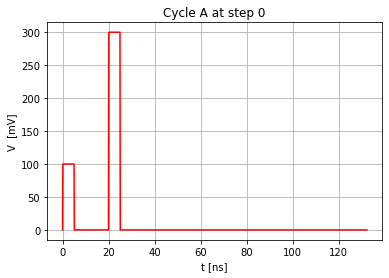

In [91]:
step = 0
pul1 = Sweep_teil(PulseScheme_A_1nano,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe width 1nano {g} step.png'.format(g =  step, loc = PulseScheme_A_1nano['Measurement file Path']),bbox_inches='tight')

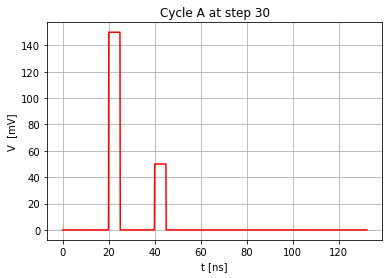

In [68]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_1nano,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe width 1nano {g} step.png'.format(g =  step, loc = PulseScheme_A_1nano['Measurement file Path']),bbox_inches='tight')

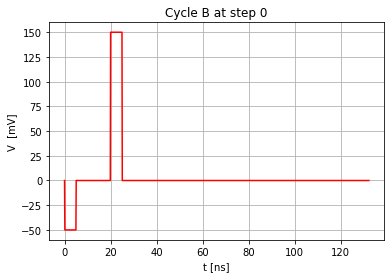

In [69]:
step = 0
pul1 = Sweep_teil(PulseScheme_B_1nano,30,step,interval,samples)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle B, Probe width 1nano.jpeg {g} step.png'.format(g =  step, loc = PulseScheme_A_1nano['Measurement file Path']),bbox_inches='tight')

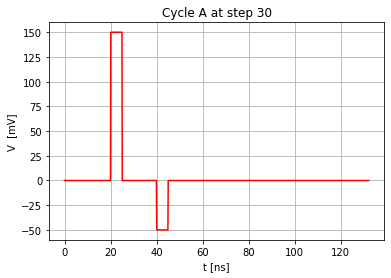

In [70]:
step = 30
pul1 = Sweep_teil(PulseScheme_B_1nano,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle B, Probe width 1nano {g} step.png'.format(g =  step, loc = PulseScheme_A_1nano['Measurement file Path']),bbox_inches='tight')

In [71]:
interval

132.27513227513228

In [72]:
sam

1008

In [92]:
sweeping_run_a_1nano = Sweeping_Single_List_File_teil(PulseScheme_A_1nano,70,interval,sam,0,70,AWG_Settings_1nano,'A')[0]
sweeping_run_b_1nano = Sweeping_Single_List_File_teil(PulseScheme_B_1nano,70,interval,sam,0,70,AWG_Settings_1nano,'B')[0]

In [93]:
#Exporting pickle

with open(r"{dict}\cycleA_100steps_189Hz_1nano_70segment.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_1nano, k)


with open(r"{dict}\cycleB_100steps_189Hz_1nano_70segment.p".format(dict = PulseScheme_B_1nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_1nano, h)

In [8]:
#Importing Pickle spikes

with open(r"{dict}\cycleA_100steps_189Hz_1nano_70segment.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "rb") as j:
    sweeping_runa_1nano = pickle.load(j)

with open(r"{dict}\cycleB_100steps_189Hz_1nano_70segment.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "rb") as f:
    sweeping_runb_1nano= pickle.load(f)

In [14]:
Sequence_File(M8190A,sweeping_runa_1nano['Pulse File Location, at step 70'],sweeping_runb_1nano['Pulse File Location, at step 70'],3)

Sequence loaded with the following segment data "1,3,0,1,0,1007,2,3,0,1,0,1007" and the advancement method is COND


4

In [41]:
Sequence_File(M8190A,sweeping_runa_1nano['Pulse File Location, at step 70'],sweeping_runa_1nano['Pulse File Location, at step 70'],2)

Sequence loaded with the following segment data "1,2,0,1,0,623,2,2,0,1,0,623" and the advancement method is COND


2

# Loading

In [94]:
M8190A.write('SEQ:DEL:ALL')

12

In [25]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [77]:
Lock_In_Settings = {
'Time Constant' : '300ms',
'Sensitivity' : '100 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '189Hz'
}

In [76]:
loop_number 

20000

In [78]:
playingtime = 30

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop5(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_1nano,sweeping_run_b_1nano,PulseScheme_A_1nano['Measurement file Path'],Lock_In_Settings,loop_number)

Sequence loaded with the following segment data "1,20000,0,1,0,1007,2,20000,0,1,0,1007" and the advancement method is COND
Average Value for measurement at step 0 is 0.9986530050439223 V
Sequence loaded with the following segment data "1,20000,0,1,0,1007,2,20000,0,1,0,1007" and the advancement method is COND
Average Value for measurement at step 1 is 0.9986738427314298 V
Sequence loaded with the following segment data "1,20000,0,1,0,1007,2,20000,0,1,0,1007" and the advancement method is COND
Average Value for measurement at step 2 is 0.998659911474444 V
Sequence loaded with the following segment data "1,20000,0,1,0,1007,2,20000,0,1,0,1007" and the advancement method is COND
Average Value for measurement at step 3 is 0.9966021109074946 V
Sequence loaded with the following segment data "1,20000,0,1,0,1007,2,20000,0,1,0,1007" and the advancement method is COND
Average Value for measurement at step 4 is 0.9943948025677113 V
Sequence loaded with the following segment data "1,20000,0,1,0,100

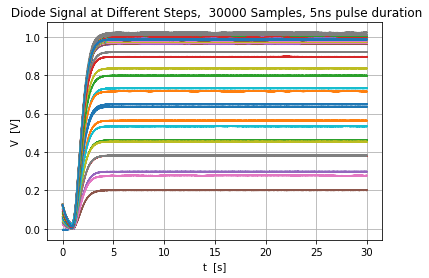

In [79]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 5ns pulse duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 1 nano,31 steps, no legend, .jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [80]:
time_delay = np.linspace(-20,20,71)

In [66]:
%matplotlib widget

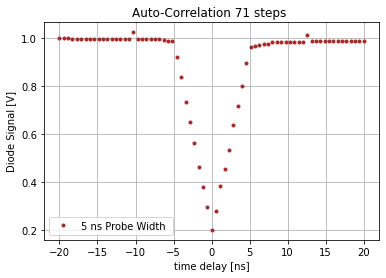

In [84]:
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,'.',label=r'5 ns Probe Width ',color='brown')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 71 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 71 steps probes  length tc = {a}, sens {b}, {c}s DAQ points .jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

In [82]:
1/189

0.005291005291005291

In [83]:
_ *1e3

5.291005291005291

In [ ]:
averaged_data = loadtxt(r'{loc}\averaged signal_31steps_30sdaqtime_45_45Hz_300ms_100 microVolts.csv'.format(loc  = PulseScheme_A_1nano['Measurement file Path'] ), delimiter= ',')

In [80]:
mod_n = 887 #Hz

1/mod_n

0.0011273957158962795

In [73]:
resolution = 1/6720000000

resolution

1.488095238095238e-10

In [116]:
40e-9/resolution

#number of sweeping steps
#500 mods

268.8

In [106]:
def Voltage_Autocorrelation_loop5(instrument,DAQ_settings,playingtime,fileA,fileB,location,Lock_In,loop):
    
    """ This function loads a sweeping sequence into the AWG, plays it and triggers it with the DAQ, while also storing the DAQ values as csv files.
      
        Sequences are formed within the AWG by combining the csv files at the same step in fileA and fileB

        instrument = object class given by Pyvisa API of the current connected device
        DAQ_Settings = Dictionary, with the settings of the DAQ box
        playingtime = int, total data collection time of the DAQ, given in seconds, maximum is 180s (given by the timeout time in the DAQ_Measuring function)
        fileA = dictionary, with the file paths of the csv files to be loaded into the awg as first part of the sequence
        fileB = dictionary, with the file paths of the csv files to be loaded into the awg as second part of the sequence
        location = strng, file path were the data is going to be saved
        Lock_In = dictionary, the keys are the Lock In Amplifier settings used to address them in the file name
        loop = int, number of repetitions that each waveform will repeat itself per cycle
    """
    #empty arrays where the data will be stored
    measurement_data = np.zeros((len(fileA),2),  dtype=object)
    average = np.zeros((len(fileA)))

    for i,j,k in zip(fileA, fileB,range(0,len(fileA))):
        Sequence_File(instrument,fileA[i],fileB[j],loop)
        measurement_data[k][0], measurement_data[k][1] = DAQ_Measuring(DAQ_settings,DAQ_settings['Sampling Frequency'],playingtime,instrument)
        np.savetxt(r'{loc}\diode_signal_step{stp}_{f}sdaqtime_{mod}_{tc}_{sens}.csv'.format(loc = location ,stp = k,f = playingtime, mod = Lock_In['Modulation'] ,tc = Lock_In['Time Constant'], sens = Lock_In['Sensitivity']), measurement_data[k][0], delimiter=',')
        average[k] = np.average(measurement_data[k][0][5000:])
        print('Average Value for measurement at step {step} is'.format(step = k),average[k],'V')
        np.savetxt(r'{loc}\averaged signal_31steps_{dur}sdaqtime_{mod}_{tc}_{sens}.csv'.format(loc =location,dur = playingtime,  mod = Lock_In['Modulation'] , tc = Lock_In['Time Constant'], sens = Lock_In['Sensitivity']),average,delimiter=',')
        
    return measurement_data, average


In [ ]:
93 mod,
71 sweeps
1 unit sep

measured waveforms

# 